# Investigación de Operaciones
## Métodos de transporte
### Esquina Noroeste

De parte del grupo 1, realizamos el método de esquina noroeste para la siguiente tabla de demanda y oferta:
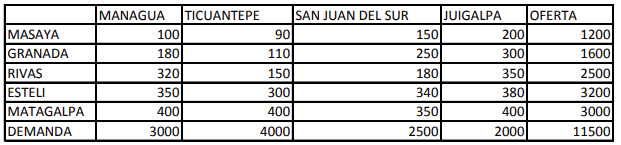




[[   0.    0.    0.    0.    0.]
 [   0. 1200.    0.    0.    0.]
 [   0. 1600.    0.    0.    0.]
 [   0.  200. 2300.    0.    0.]
 [   0.    0. 1700. 1500.    0.]
 [   0.    0.    0. 1000. 2000.]]


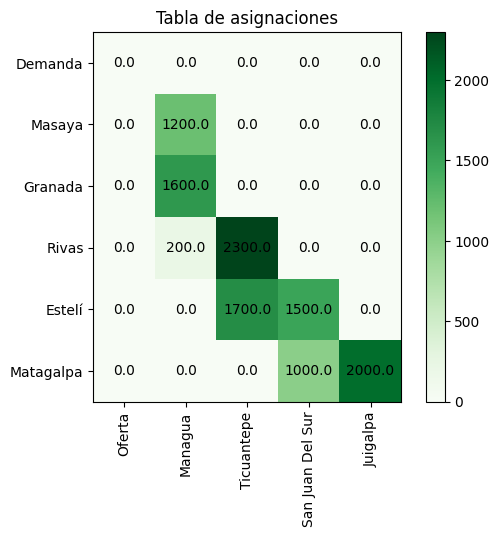

In [1]:
import numpy as np
import matplotlib.pyplot as graph
import matplotlib.pyplot as plt
import networkx as nx
# Definir datos
Etiquetas = {"Destinos": ['Oferta', 'Managua','Ticuantepe', 'San Juan Del Sur', 'Juigalpa'],
             "Origenes": ['Demanda', 'Masaya', "Granada", "Rivas", "Estelí", "Matagalpa" ],
            }
costos =np.array([[100, 90, 150, 200],
          [180, 110, 250, 300],
          [320, 150, 180, 350],
          [350, 300, 340, 380],
          [400, 400, 350, 400]
          ])

oferta = np.array([[1200],
          [1600],
          [2500],
          [3200],
          [3000],
         ])

demanda = np.array([[3000, 4000, 2500, 2000]])
asignaciones = np.zeros((len(Etiquetas["Origenes"]), len(Etiquetas["Destinos"])))


def esquina_noroeste(costos, oferta, demanda):
    asignaciones = np.zeros((oferta.size + 1, 1 + demanda.size))    
    i, j = 0, 0
    oferta = np.squeeze(oferta)
    demanda = np.squeeze(demanda)
    while i < costos.shape[0] and j < costos.shape[1]:
        if np.all(oferta[i]) == 0 or np.all(demanda[j]) == 0:
            if oferta[i] == 0:
                i += 1
            else:
                j += 1
        else:
            cantidad = min(oferta[i], demanda[j])
            asignaciones[i+1, j+1] = cantidad
            oferta[i] -= cantidad
            demanda[j] -= cantidad
            if oferta[i] == 0:
                i += 1
            if demanda[j] == 0:
                j += 1
                
    return asignaciones
asignaciones = esquina_noroeste(costos, oferta, demanda)
print(asignaciones)
for i in range(len(Etiquetas["Origenes"])):
    for j in range(len(Etiquetas["Destinos"])):
        plt.annotate(str(asignaciones[i, j]), xy=(j, i), ha="center", va="center")

plt.imshow(asignaciones, cmap='Greens')
plt.colorbar()
plt.xticks(range(len(Etiquetas['Destinos'])), Etiquetas['Destinos'], rotation=90)
plt.yticks(range(len(Etiquetas['Origenes'])), Etiquetas['Origenes'])
plt.title('Tabla de asignaciones')
plt.show()